##7.2.2.KorNLI_EDA.ipynb

카카오 브레인에서 공개한 새로운 한국어 벤치마크 셋인 KorNLI 데이터를 다음과 같이 분석해 본다. 
1. 문장 중복 횟수  2. 문장의 길이  3. 문장별 단어 개수  4. 문장별 토큰 개수  5. 워드 클라우드와 라벨에 따른 데이터 개수 분포  

###기본 환경 구성

In [ ]:
!pip install transformers==3.0.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np                           # 패키지 불러오기 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns                                          # 데이터 시각화 라이브러리 
from transformers import BertTokenizer                         # 토큰 길이 측정을 위해 버트 토크나이저 패키지를 불러온다. 

In [ ]:
DATA_IN_PATH = 'drive/MyDrive/data_in/KOR'

###문장 파일 받아와서 확인하기 

In [ ]:
TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')        # 파일이 있는 폴더 선언 

multinli_data = pd.read_csv(TRAIN_XNLI_DF, sep='\t', error_bad_lines=False)          # 판다스로 파일 불러오기 (error_bad_lines=False: 데이터를 토큰화하다가 문제가 생기는 경우에 그 문장은 넘기고 지속)
multinli_data.head(10)                                                               # 정답은 각각 '수반', '모순', '중립'

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [ ]:
print('전체 multinli_data 개수: {}'.format(len(multinli_data)))

전체 multinli_data 개수: 385494


In [ ]:
TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.kor.tsv')

snli_data = pd.read_csv(TRAIN_SNLI_DF, sep='\t', error_bad_lines=False)
snli_data.head(10)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [ ]:
print('전체 snli_data 개수: {}'.format(len(snli_data)))

전체 snli_data 개수: 550152


In [ ]:
train_data = pd.concat([multinli_data, snli_data], axis=0)                            # 데이터 파일 합치기
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [ ]:
print('전체 train_data 개수: {}'.format(len(train_data)))

전체 train_data 개수: 935646


In [ ]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)              # 책 코드 (문장이 합쳐지는 것은 아님) 각 문장 리스트를 위아래로 붙임 
train_set.head()

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [ ]:
#train_set = pd.Series(train_data['sentence1']+ train_data['sentence2']).astype(str)                               # 추가 코드 (두 문장이 합쳐짐)
#train_set.head()

0    개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.제품과 ...
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.우리 팀의 일원이 당신의...
3           어떻게 아세요? 이 모든 것이 다시 그들의 정보다.이 정보는 그들의 것이다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [ ]:
print('전체 문장 데이터의 개수: {}'.format(len(train_set)))            # 180만 개의 문장     # 수정 시  93만 개

전체 문장 데이터의 개수: 1871292


In [ ]:
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))                    # 리스트에서 중복된 요소를 제거하고 한 번씩만 리턴 
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))      # 출현 횟수가 두 번 이상인 문장이 308,368 개

유일한 총 문장 수 : 1105355
반복해서 나타나는 문장의 수: 308368


###파일 문장 시각화

**문장 중복 발생 횟수** 에 대한 로그 스케일 히스토그램

Text(0, 0.5, 'Number of sentence')

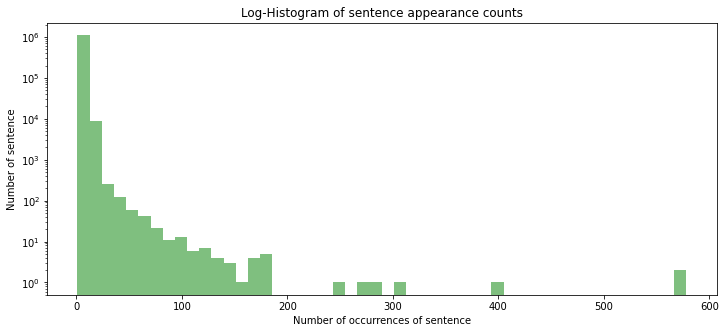

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'g', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of sentence appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of sentence')

In [ ]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))                    # 영어 문장 번역이라 원본 문장은 다르지만 한국어 문장은 동일할 수 있음. 
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음(전체 데이터에서 1/4, 3/4 지점)
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 578
중복 최소 개수: 1
중복 평균 개수: 1.69
중복 표준편차: 2.23
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 3.0


박스 플롯

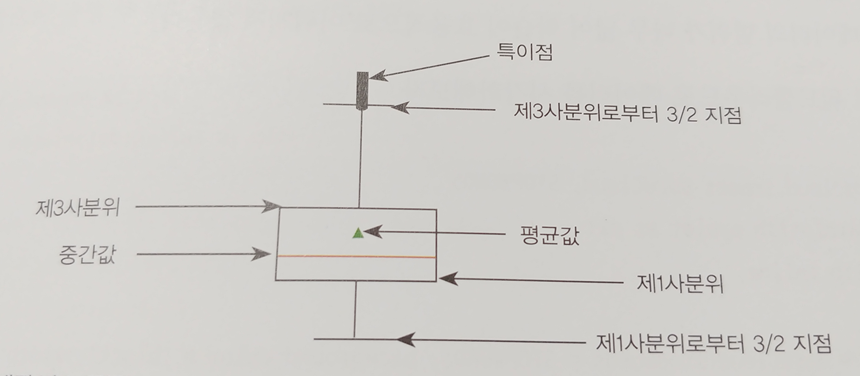

{'boxes': [<matplotlib.lines.Line2D at 0x7fc9a87486d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc9a874c750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9a874fcd0>],
 'means': [<matplotlib.lines.Line2D at 0x7fc9a874f790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9a874f250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc9a8748c90>,
  <matplotlib.lines.Line2D at 0x7fc9a874c210>]}

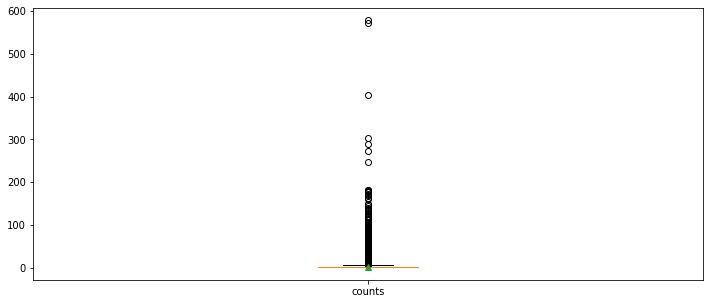

In [ ]:
plt.figure(figsize=(12, 5))

# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)                                            # 이상치가 넓게 많이 분포하고 있음을 알 수 있다. 

**데이터 길이(글자수)** 에 따른 문장 확률 분포

In [ ]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

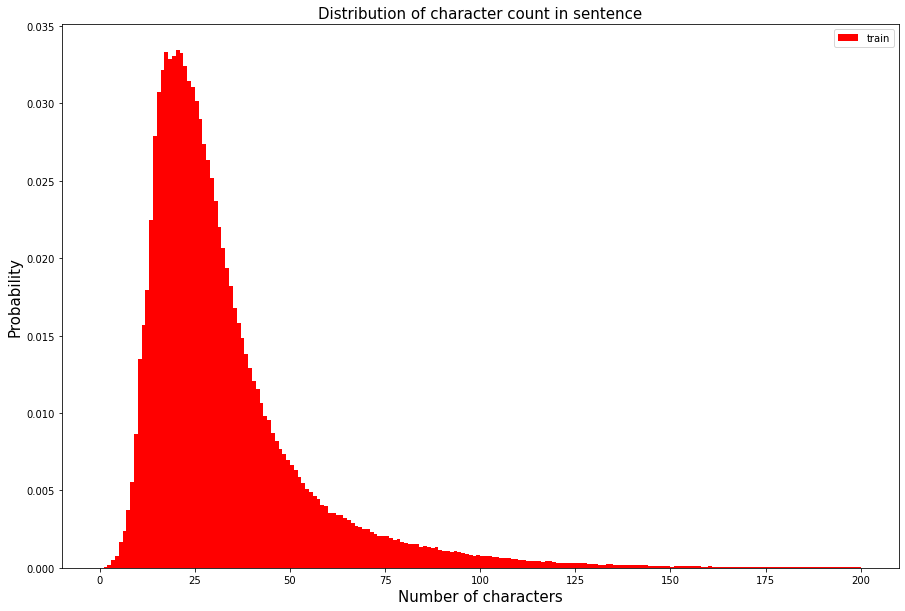

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 16542
문장 길이 평균 값: 33.02
문장 길이 표준편차: 47.97
문장 길이 중간 값: 26.0
문장 길이 제 1 사분위: 19.0
문장 길이 제 3 사분위: 39.0


박스플롯

{'boxes': [<matplotlib.lines.Line2D at 0x7f5d5da78fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5d5da7f090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d5da0c610>],
 'means': [<matplotlib.lines.Line2D at 0x7f5d5da0c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d5da7fb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5d5da7b5d0>,
  <matplotlib.lines.Line2D at 0x7f5d5da7bb10>]}

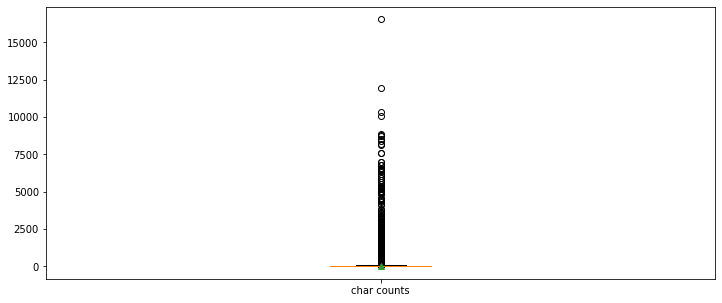

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)                                                      # 마찬가지로 이상치가 과다

**단어 개수**에 대한 히스토그램

In [ ]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))                     # 띄어쓰기 기준?

In [ ]:
testsen=pd.Series(["나는 어제 밤에 사과를 먹었다.", "감자도리"])                   # 추가 부분

word_counts = testsen.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(word_counts)))

문장 단어 개수 최대 값: 5
문장 단어 개수 평균 값: 3.00


Text(0, 0.5, 'Probability')

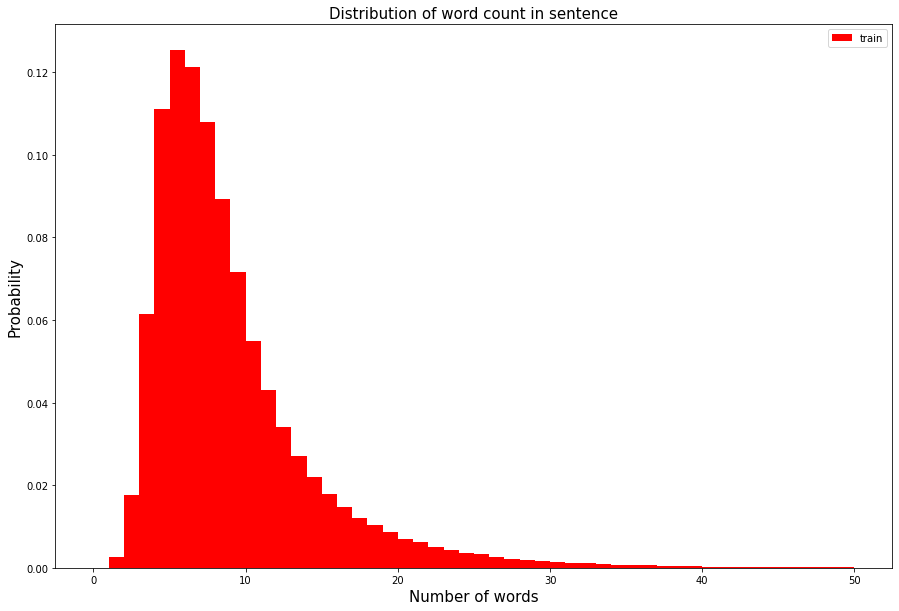

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

문장 단어 개수 최대 값: 3295
문장 단어 개수 평균 값: 8.64
문장 단어 개수 표준편차: 10.08
문장 단어 개수 중간 값: 7.0
문장 단어 개수 제 1 사분위: 5.0
문장 단어 개수 제 3 사분위: 10.0
문장 단어 개수 99 퍼센트: 30.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f5d5d8fa190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5d5d900210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5d5d887750>],
 'means': [<matplotlib.lines.Line2D at 0x7f5d5d887250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d5d900cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5d5d8fa750>,
  <matplotlib.lines.Line2D at 0x7f5d5d8fac90>]}

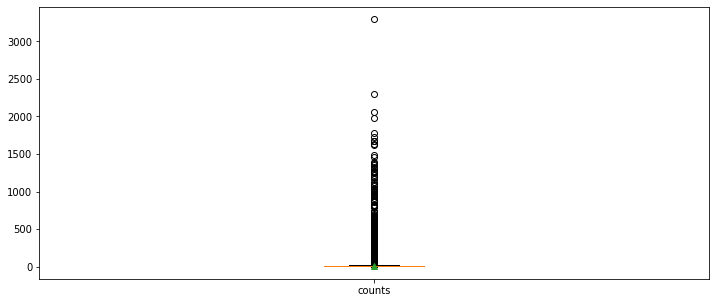

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)


###문장 구성 알아보기

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

In [ ]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 문장: {:.2f}%'.format(numbers * 100))

### Tokenizer Cased (문장 토큰 개수 분포 분석)

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [ ]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

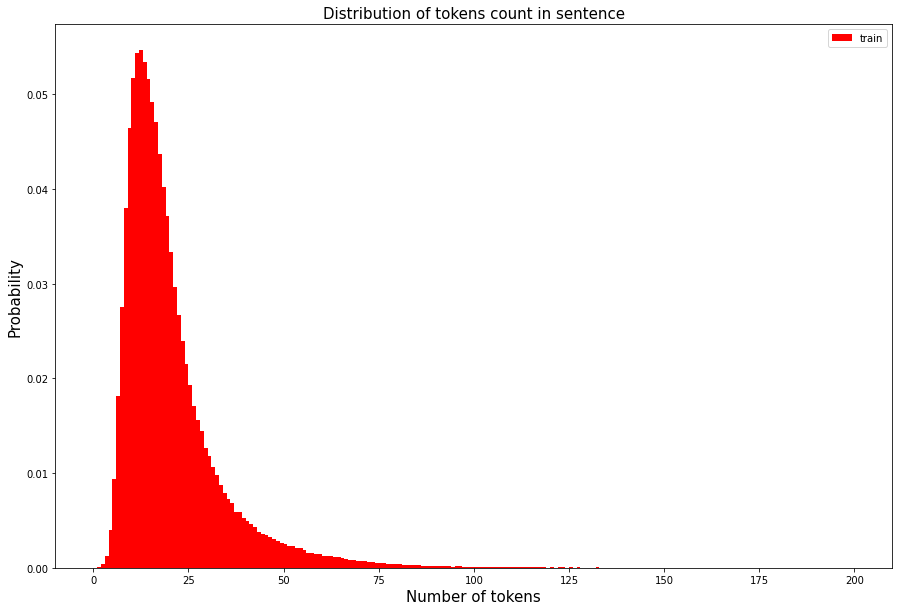

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최대 값: 9006
문장 tokens 개수 평균 값: 20.24
문장 tokens 개수 표준편차: 26.77
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 11.0
문장 tokens 개수 제 3 사분위: 24.0
문장 tokens 개수 99 퍼센트: 72.0


평균 20, 중간 값 16. 최댓값은 9006.  모델의 속도와 성능을 고려해 최대 길이를 제 3 사분위 값인 24에 맞추기로 한다. 

{'boxes': [<matplotlib.lines.Line2D at 0x7fc83a270710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc83a274790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc83a27bd10>],
 'means': [<matplotlib.lines.Line2D at 0x7fc83a27b7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc83a27b290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc83a803610>,
  <matplotlib.lines.Line2D at 0x7fc83a274250>]}

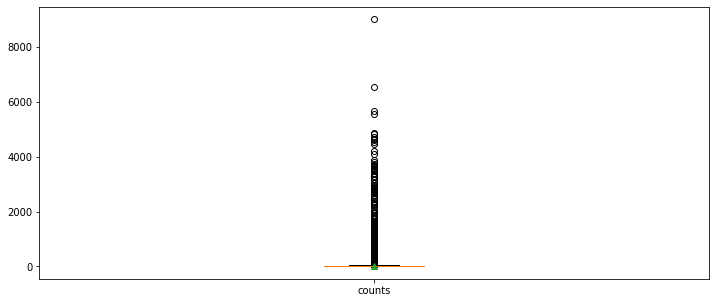

In [ ]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

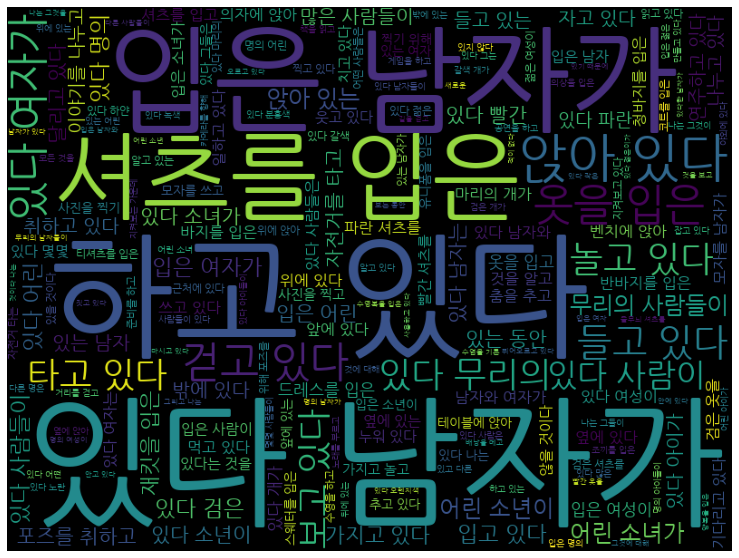

In [ ]:
from wordcloud import WordCloud                                # 기존 코드에 없는 부분
font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud  = WordCloud(font_path = font_path, width=800, height=600).generate("".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

남자가, 여자가 등의 상반되는 성별 표현과 하고 있다, 있다 와 같은 상태에 대한 유사한 표현이 많이 등장한다. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


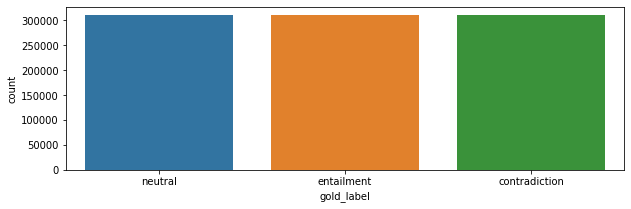

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(train_data['gold_label'])

각각 30만 개 이상의 세 가지 값의 분포가 동일한 학습 데이터이다. 이러한 균등한 데이터는 모델 학습 시 좋은 데이터이다. 

##7.2.2.bert_finetune_KorNLI.ipynb

###기본 환경 구성

In [ ]:
!pip install transformers==3.0.2

     |████████████████████████████████| 769 kB 5.1 MB/s 
     |████████████████████████████████| 3.0 MB 47.4 MB/s 
     |████████████████████████████████| 1.2 MB 49.2 MB/s 
     |████████████████████████████████| 895 kB 23.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

In [ ]:
# 시각화

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
#random seed 고정

tf.random.set_seed(1234)
np.random.seed(1234)

# BASE PARAM

BATCH_SIZE = 32                 # 책은 128
NUM_EPOCHS = 3
MAX_LEN = 24 * 2                # 최대 길이로 사용하기로 한 제 3 사분위 값 * 2 (두 문장 들어가니까)

DATA_IN_PATH = 'drive/MyDrive/data_in/KOR'
DATA_OUT_PATH = "drive/MyDrive/data_out/KOR"

### KorNLI Dataset

Data from Kakaobrain:  https://github.com/kakaobrain/KorNLUDatasets

데이터 파일(트레인, val) 불러오고 합치기, 토크나이저 지정 후 인풋값 출력

In [ ]:
# 트레인, dev 데이터셋 불러오기 

TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.kor.tsv')     # 가져와서
TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')
DEV_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'xnli.dev.ko.tsv')

train_data_snli = pd.read_csv(TRAIN_SNLI_DF, header=0, delimiter = '\t', quoting = 3)    # 읽어들임
train_data_xnli = pd.read_csv(TRAIN_XNLI_DF, header=0, delimiter = '\t', quoting = 3)
dev_data_xnli = pd.read_csv(DEV_XNLI_DF, header=0, delimiter = '\t', quoting = 3)

train_data_snli_xnli = train_data_snli.append(train_data_xnli)
train_data_snli_xnli = train_data_snli_xnli.dropna()
train_data_snli_xnli = train_data_snli_xnli.reset_index()

dev_data_xnli = dev_data_xnli.dropna()

print("Total # dataset: train - {}, dev - {}".format(len(train_data_snli_xnli), len(dev_data_xnli)))   # 트레인은 두 파일을 합쳐줬고, dev는 하나의 파일을 불러옴. 

Total # dataset: train - 942808, dev - 2490


In [ ]:
# Bert Tokenizer

# 참조: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

def bert_tokenizer_v2(sent1, sent2, MAX_LEN):                                  # 문장을 두 개 받는 함수 
       
    encoded_dict = tokenizer.encode_plus(
        text = sent1,
        text_pair = sent2,                                                     # encode_plus에 text_pair를 추가해주면 2개의 문장을 받아 버트의 입력에 맞게 만들어 줌. 
        add_special_tokens = True, 
        max_length = MAX_LEN,           
        pad_to_max_length = True,
        truncation = True,
        return_attention_mask = True   
        
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] 
    token_type_id = encoded_dict['token_type_ids']    # differentiate two sentences
    
    return input_id, attention_mask, token_type_id

In [ ]:
# 문장 예시
sent1= "这猫肥肥的，好可爱。"
sent2="大家来看看吧。"

bert_tokenizer_v2(sent1, sent2, MAX_LEN)                # 패딩 부분은 인풋, 어텐션 모두 0이기 때문에 문장 순서 id가 1번 문장과 같아도 학습에 방해가 되지 않는다. 

([101,
  7700,
  5453,
  6513,
  6513,
  5718,
  10064,
  3240,
  2756,
  5383,
  1882,
  102,
  3197,
  3408,
  4501,
  5765,
  5765,
  2790,
  1882,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

In [ ]:
input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(train_data_snli_xnli['sentence1'], train_data_snli_xnli['sentence2']):   # 합쳐진 데이터 파일에서 각각 문장1과 문장2를 sen1, sen2로 받음
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
train_snli_xnli_input_ids = np.array(input_ids, dtype=int)
train_snli_xnli_attention_masks = np.array(attention_masks, dtype=int)
train_snli_xnli_type_ids = np.array(token_type_ids, dtype=int)
train_snli_xnli_inputs = (train_snli_xnli_input_ids, train_snli_xnli_attention_masks, train_snli_xnli_type_ids)   # 세 가지 인풋을 하나의 묶음으로

In [ ]:
input_id = train_snli_xnli_input_ids[2]
attention_mask = train_snli_xnli_attention_masks[2]
token_type_id = train_snli_xnli_type_ids[2]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[  101  9251 10622  9847 97802  8888 13890 33305  9379 25549 12310  9619
 11261  9150 12965 28188 66346   119   102  9405 61250 10892  9538 78705
 11489  9251 10622  9845 11664 11506   119   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[CLS] 말을 탄 사람이 고장난 비행기 위로 뛰어오른다. [SEP] 사람은 야외에서 말을 타고 있다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


### DEV SET Preprocessing & Training

검증 데이터셋 전처리, 라벨 숫자 변환, 학습 진행

In [ ]:
# 토크나이저를 제외하고는 5장에서 처리한 방식과 유사하게 접근
input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(dev_data_xnli['sentence1'], dev_data_xnli['sentence2']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
dev_xnli_input_ids = np.array(input_ids, dtype=int)
dev_xnli_attention_masks = np.array(attention_masks, dtype=int)
dev_xnli_type_ids = np.array(token_type_ids, dtype=int)
dev_xnli_inputs = (dev_xnli_input_ids, dev_xnli_attention_masks, dev_xnli_type_ids)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/user/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2016: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Label을 Entailment, Contradiction, Neutral 에서 숫자 형으로 변경한다.
label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2}                # 각 라벨의 인덱스 지정
def convert_int(label):
    num_label = label_dict[label]    
    return num_label

train_data_snli_xnli["gold_label_int"] = train_data_snli_xnli["gold_label"].apply(convert_int)     # 문자로 되어 있는 정답들을 숫자로 변형해서 새로운 열 이름으로 저장
train_data_labels = np.array(train_data_snli_xnli['gold_label_int'], dtype=int)                    # labels에 넘파이 배열로 저장 

dev_data_xnli["gold_label_int"] = dev_data_xnli["gold_label"].apply(convert_int)
dev_data_labels = np.array(dev_data_xnli['gold_label_int'], dtype=int)

print("# train labels: {}, #dev labels: {}".format(len(train_data_labels), len(dev_data_labels)))

In [ ]:
class TFBertClassifier(tf.keras.Model):                                                 # 1주차와 비슷 
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)                        # 사전학습된 가중치 값 불러오기 
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt', 
                                  num_class=3)                                     # 정답이 세 가지 

In [ ]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
#학습 진행하기
model_name = "tf2_KorNLI"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_snli_xnli_inputs, train_data_labels, epochs=NUM_EPOCHS,
            validation_data = (dev_xnli_inputs, dev_data_labels),
            batch_size=BATCH_SIZE, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch
print(history.history)

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### KorNLI Test dataset

테스트 데이터 전처리 및 정확도 측정

In [ ]:
# Load Test dataset
TEST_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'xnli.test.ko.tsv')

test_data_xnli = pd.read_csv(TEST_XNLI_DF, header=0, delimiter = '\t', quoting = 3)
test_data_xnli = test_data_xnli.dropna()
test_data_xnli.head()

In [ ]:
# Test set도 똑같은 방법으로 구성한다.

input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(test_data_xnli['sentence1'], test_data_xnli['sentence2']):
    
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
    
test_xnli_input_ids = np.array(input_ids, dtype=int)
test_xnli_attention_masks = np.array(attention_masks, dtype=int)
test_xnli_type_ids = np.array(token_type_ids, dtype=int)
test_xnli_inputs = (test_xnli_input_ids, test_xnli_attention_masks, test_xnli_type_ids)

In [ ]:
test_data_xnli["gold_label_int"] = test_data_xnli["gold_label"].apply(convert_int)
test_data_xnli_labels = np.array(test_data_xnli['gold_label_int'], dtype=int)

print("# sents: {}, # labels: {}".format(len(test_xnli_input_ids), len(test_data_xnli_labels)))

In [ ]:
results = cls_model.evaluate(test_xnli_inputs, test_data_xnli_labels, batch_size=512)
print("test loss, test acc: ", results)